Import required libraries

In [ ]:
import numpy as np 
import pandas as pd 
import os
import pickle
import matplotlib.pyplot as plt

In [ ]:
#this library used for extracting features from music midi files
import music21 as m

In [ ]:
sample_path = 'Dataset/schubert_D850_1.mid'

In [ ]:
midi = m.converter.parse(sample_path)
s = m.instrument.partitionByInstrument(midi)
for part in s.parts:
    print(part)

<music21.stream.Part Piano>


In [ ]:
midi = m.converter.parse(sample_path)
s = m.instrument.partitionByInstrument(midi)
for part in s.parts:
    notes = part.recurse()
    for n in notes:
        if isinstance(n, m.note.Note):
            print(n.pitch)

In [ ]:
midi = m.converter.parse(sample_path)
s = m.instrument.partitionByInstrument(midi)
for part in s.parts:
    notes = part.recurse()
    for n in notes:
        if isinstance(n, m.chord.Chord):
            print(n.normalOrder)

this read_midi function will read all the midi files and extract notes and chord from them

In [ ]:
def read_midi(file):
    try:
        print("Loading Music File:",file)
        notes=[]
        notes_to_parse = None
        midi = m.converter.parse(file)
        s = m.instrument.partitionByInstrument(midi)

        for part in s.parts:
            if 'Piano' in str(part): 
                notes_to_parse = part.recurse() 
                for element in notes_to_parse:
                    if isinstance(element, m.note.Note):
                        notes.append(str(element.pitch))
                    elif isinstance(element, m.chord.Chord):
                        notes.append('.'.join(str(n) for n in element.normalOrder))
    except:
        pass

    return np.array(notes)

In [ ]:
path = 'Dataset'
files = []
for file in os.listdir(path):
  files.append(os.path.join(path, file))
print(len(files))

29


In [ ]:
files[0]

this would take few minutes to run and will extract features

In [ ]:
notes_array = np.array([read_midi(i) for i in files])

store the extracted notes and chords in a pickle file as it takes long for extracting

In [ ]:
with open('notes_array_new.pkl','wb') as f:
    pickle.dump(notes_array, f)

In [ ]:
with open('notes_array_new.pkl','rb') as f:
    notes_array = pickle.load(f)

In [ ]:
notes_array

In [ ]:
notes = [note for array in notes_array for note in array]
unique_notes = list(set(notes))
len(unique_notes)

304

In [ ]:
from collections import Counter
freq = dict(Counter(notes))

(array([187.,  41.,  26.,  11.,   6.,   9.,  12.,   6.,   3.,   3.]),
 array([1.0000e+00, 1.4790e+02, 2.9480e+02, 4.4170e+02, 5.8860e+02,
        7.3550e+02, 8.8240e+02, 1.0293e+03, 1.1762e+03, 1.3231e+03,
        1.4700e+03]),
 <a list of 10 Patch objects>)

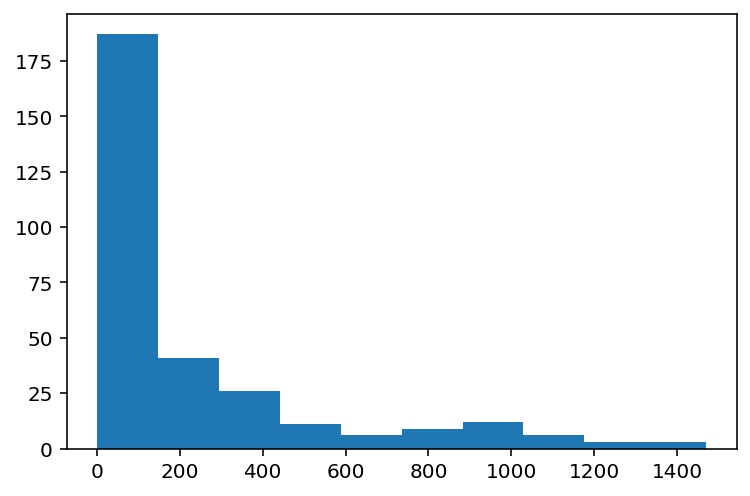

In [ ]:
tmp = [count for _, count in freq.items()]
plt.hist(tmp)

remove all the rare notes 

In [ ]:
notes_cleaned = [note for note, count in freq.items() if count>=10]
len(notes_cleaned)

225

In [ ]:
new_notes_array = []
for array in notes_array:
  tmp = []
  for note in array:
    if note in notes_cleaned:
      tmp.append(note)
  new_notes_array.append(tmp)

print(new_notes_array)

[['2.6.9', '2', '9.2', '2.6', '9.2', '2.6', '9.2', '2.6', '9.2', '2.6', 'A3', 'D4', 'F#2', 'D3', '11.4', '4.7', '0.2.6', '2.6.9', '0.2.6', '2.6.9', '0.2.6', '2.6.9', '0.2.6', '2.6.9', '0.6', 'D4', 'D3', '6.9', '7.11', '7.11', 'E4', 'E3', 'G4', 'G3', 'F#4', 'F#3', 'E4', 'E3', 'B-4', 'B-3', 'A4', 'A3', 'G4', 'G3', 'A4', 'A3', 'F#5', 'D4', 'E5', 'E4', 'D5', 'F#4', 'A5', 'A3', 'G5', 'C#4', 'F#5', 'D4', 'E5', 'E4', 'D5', 'F#4', 'C#5', 'G4', '2.5.9', '2', '9.2', '2.5', '9.2', '2.5', '9.2', '2.5', '9.2', '2.5', 'A3', 'D4', 'F2', 'D3', '4.10', '4.7', '0.2.6', '2.6.9', '0.2.6', '2.6.9', '0.2.6', '2.6.9', '0.2.6', '2.6.9', '0.6', 'D4', 'D3', '6.9', '7.10', '7.10', '2.5.8', '5.8.11', '2.5.8', '5.8.11', '2.5.8', '5.8.11', '2.5.8', '5.8.11', '5.9.0', '5.9.0', 'C5', 'B-4', 'A4', 'G4', 'C3', 'F4', 'C3', 'E4', 'D4', 'C3', 'C4', 'C3', 'B-3', 'A3', 'C3', 'B-3', 'C4', 'C5', 'A2', 'B-4', 'A4', 'G4', 'C3', 'F4', 'C3', 'E4', 'D4', 'C3', 'C4', 'C3', 'B-3', 'A3', 'C3', 'B-3', 'C4', 'A3', 'B-3', 'C4', 'A3', 'F

In [ ]:
len(new_notes_array)

29

In [ ]:
for array in new_notes_array:
  print(len(array))

5893
2701
2932
2626
4218
3672
4639
1035
2021
2791
0
0
0
2721
2774
1774
2490
691
1923
2945
933
2179
1238
2239
0
3765
933
4433
3106


In [ ]:
new_notes_array = np.array(new_notes_array)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


create sequential data with 32 as timestamp

In [ ]:
timestamp = 32
x, y = [], []
for array in new_notes_array:
  for i in range(len(array)-timestamp):
    x.append(array[i:i+timestamp])
    y.append(array[i+timestamp])
x, y = np.array(x), np.array(y)

In [ ]:
x

array([['2.6.9', '2', '9.2', ..., '7.11', 'E4', 'E3'],
       ['2', '9.2', '2.6', ..., 'E4', 'E3', 'G4'],
       ['9.2', '2.6', '9.2', ..., 'E3', 'G4', 'G3'],
       ...,
       ['9.2', 'A2', '4.7.9', ..., '2.6.9', 'D3', '2.6.9'],
       ['A2', '4.7.9', '4.7.9', ..., 'D3', '2.6.9', '9.2'],
       ['4.7.9', '4.7.9', 'G3', ..., '2.6.9', '9.2', '2.6.9']],
      dtype='<U8')

In [ ]:
y

array(['G4', 'G3', 'F#4', ..., '9.2', '2.6.9', '9.2'], dtype='<U8')

In [ ]:
new_unique_notes = list(set(x.ravel()))
x_note_to_int = dict((note, i) for i, note in enumerate(new_unique_notes))

In [ ]:
x_note_to_int

In [ ]:
x_seq = []

for i in x:
  tmp = []
  for j in i:
    tmp.append(x_note_to_int[j])
  x_seq.append(tmp)
x_seq = np.array(x_seq)

In [ ]:
unique_y = list(set(y))
y_note_to_int = dict((note, i) for i, note in enumerate(unique_y))
y_seq = []
for i in y:
  y_seq.append(y_note_to_int[i])
y_seq = np.array(y_seq)

In [ ]:
x_int_to_note = dict((number, note_) for number, note_ in enumerate(new_unique_notes)) 

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_seq,y_seq,test_size=0.2,random_state=1)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((52697, 32), (13175, 32), (52697,), (13175,))

In [ ]:
x_train = x_train.reshape(*(x_train.shape),1)
y_train = y_train.reshape(*(y_train.shape),1)
x_test = x_test.reshape(*(x_test.shape),1)
y_test = y_test.reshape(*(y_test.shape),1)

x_train = x_train.astype(np.float32)
y_train = y_train.astype(np.float32)
x_test = x_test.astype(np.float32)
y_test = y_test.astype(np.float32)

In [ ]:
x_train.dtype

dtype('float32')

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((52697, 32, 1), (13175, 32, 1), (52697, 1), (13175, 1))

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Activation

create model and train

In [ ]:
model = Sequential()
model.add(LSTM(128,return_sequences=True))
model.add(LSTM(128,return_sequences=True))
model.add(LSTM(64))
model.add(Dense(256, activation='relu'))
model.add(Dense(len(unique_y), activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, epochs=40, verbose=1)
model.save('music_model.h5')

Epoch 1/40
412/412 [==============================] - 38s 13ms/step - loss: 4.9237 - val_loss: 4.7123
Epoch 2/40
412/412 [==============================] - 4s 10ms/step - loss: 4.6424 - val_loss: 4.5124
Epoch 3/40
412/412 [==============================] - 4s 10ms/step - loss: 4.4459 - val_loss: 4.3575
Epoch 4/40
412/412 [==============================] - 4s 10ms/step - loss: 4.2660 - val_loss: 4.2141
Epoch 5/40
412/412 [==============================] - 4s 10ms/step - loss: 4.0802 - val_loss: 4.0726
Epoch 6/40
412/412 [==============================] - 4s 10ms/step - loss: 3.8878 - val_loss: 3.9419
Epoch 7/40
412/412 [==============================] - 4s 10ms/step - loss: 3.7315 - val_loss: 3.8640
Epoch 8/40
412/412 [==============================] - 4s 10ms/step - loss: 3.5727 - val_loss: 3.7608
Epoch 9/40
412/412 [==============================] - 4s 10ms/step - loss: 3.4276 - val_loss: 3.6982
Epoch 10/40
412/412 [==============================] - 4s 10ms/step - loss: 3.3077 - val_l

In [ ]:
from keras.models import load_model
model = load_model('music_model.h5')

Generate new music

In [ ]:
def convert_to_midi(prediction_output):
   
    offset = 0
    output_notes = []

    # create note and chord objects based on the values generated by the model
    for pattern in prediction_output:
        
        # pattern is a chord
        if ('.' in pattern) or pattern.isdigit():
            notes_in_chord = pattern.split('.')
            notes = []
            for current_note in notes_in_chord:
                cn = int(current_note)
                new_note = m.note.Note(cn)
                new_note.storedInstrument = m.instrument.Piano()
                notes.append(new_note)
                
            new_chord = m.chord.Chord(notes)
            new_chord.offset = offset
            output_notes.append(new_chord)
            
        # pattern is a note
        else:
            new_note = m.note.Note(pattern)
            new_note.offset = offset
            new_note.storedInstrument = m.instrument.Piano()
            output_notes.append(new_note)

        # increase offset each iteration so that notes do not stack
        offset += 1
    midi_stream = m.stream.Stream(output_notes)
    midi_stream.write('midi', fp='music.mid')

In [ ]:
import random
ind = np.random.randint(0,len(x_train)-1)
random_music = x_train[ind]

predictions=[]
for i in range(50):
    random_music = random_music.reshape(1,timestamp,1)
    prob  = model.predict(random_music)[0]
    y_pred= np.argmax(prob,axis=0)
    predictions.append(y_pred)
    random_music = np.insert(random_music[0],len(random_music[0]),y_pred)
    random_music = random_music[1:]
print(predictions)

predicted_notes = [x_int_to_note[i] for i in predictions]
convert_to_midi(predicted_notes)

generated music will be saved to current working location as music.mid